In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import scipy.fftpack
import pyproj
from pyproj import Proj
import os
from bokeh.plotting import figure, output_file, show
from bokeh.charts import BoxPlot, output_file, show
import matplotlib.mlab as mlab
from ggplot import aes, geom_line, geom_point, ggplot

In [47]:
path = 'adcp_data/'
listing = os.listdir(path)
print listing

['sullivanpt_005min.mat', 'sullivanpt_005min_histogram.mat', 'sullivanpt_2nd_deployment_005min.mat', 'sullivanpt_2nd_deployment_005min_histogram.mat', 'walker_005min_histogram.mat', 'walkerst_005min.mat', 'wyman_005_histogram.mat', 'wymanst_005min.mat']


In [9]:
mat = io.loadmat(path + listing[4])  
hist = io.loadmat(path + listing[5])

In [42]:
sullivan1 = io.loadmat(path + listing[1])
sullivan2 = io.loadmat(path + listing[3])
walker = io.loadmat(path + listing[4])
wyman = io.loadmat(path + listing[6])
sites = [sullivan1, sullivan2, walker, wyman]

In [41]:
listing[4]

'walker_005min_histogram.mat'

In [49]:
sites = {'Sullivan Point':io.loadmat(path + listing[1]),'Sullivan Point Redeployment':io.loadmat(path + listing[3]),
         "Walker St. Bridge":io.loadmat(path + listing[4]), 'Wyman Ave. Bridge':io.loadmat(path + listing [6])}
keys = sites.keys()

In [6]:
def keyed(mat):
    keys = mat.keys()
    
    for i in keys:
        try:
            print i, mat[i].shape
            pass
        except AttributeError:
            print '... Error'
            continue

In [8]:
infile = sullivan1
x = np.squeeze(infile['ta'].T)
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])

print np.nanmax(yMin)
print np.nanmax(yMax)
print np.nanmean(yMean)
print np.nanmax(yPres) - np.nanmin(yPres)
print np.nanmean(yMin)
print np.nanmean(yMax)
print np.nanmean(infile['cmag'])

1.60837825734
2.2524351678
0.880732138526
23.36263776
0.540893682074
0.984697725635
0.880732138526


In [17]:
xS = walker['ta'].T
xA = wyman['ta'].T
walkerMean = np.nanmean(walker['cmag'],axis=1)
wymanMean = np.nanmin(wyman['cmag'],axis=1)
print xS[305]
print xA[305]

[ 302.39409722]
[ 302.39449398]


In [18]:
# Walker/Wyman Comparison Plot
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="Mean Current Comparison", x_axis_label='DateTime Value', y_axis_label='Velocity')

# add a line renderer with legend and line thickness
p.line(xS[0:305,0], walkerMean[0:305], legend="Walker St. Mean", line_width=2, line_color='blue')
p.line(xA[0:305,0], wymanMean[0:305], legend="Wyman Ave. Mean.", line_width=2, line_color='red')


# show the results
show(p)

In [8]:
t = np.nanargmax(yMax)
yMax[t-720:t+720].shape
low = t-144
high = t+144
print yMax

[ 1.12587136  1.16441862  1.17479875 ...,  1.1153512   1.06011262
  0.99816848]


In [25]:
'''Sullivan Slice'''
# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="Current Magnitude:Sullivan Point", x_axis_label='DateTime Value', y_axis_label='Velocity')

for i in range(y.shape[1]):
    p.line(x[low:high], y[low:high,i], legend=".", line_width=1, line_color='blue')


# show the results
show(p)

In [15]:
np.random.randint(1,69,size=5)

array([ 6, 32, 56, 27, 39])

In [19]:
for items in sites:
    print items

Sullivan Point Redeployment
Sullivan Point
Wyman Ave. Bridge
Walker St. Bridge


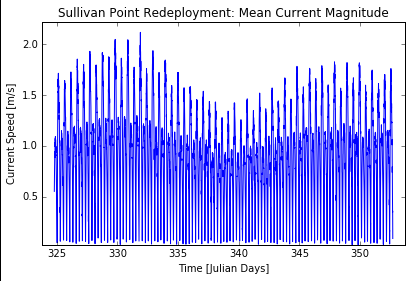

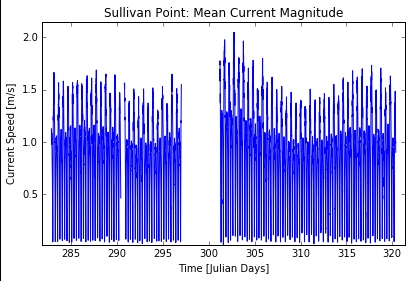

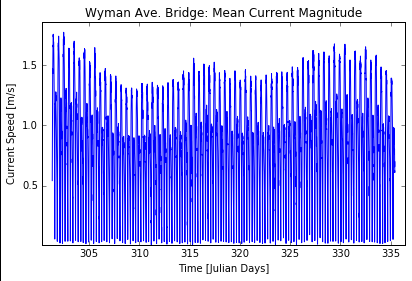

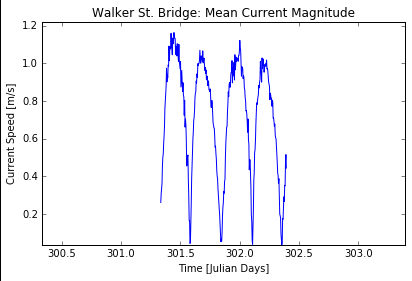

In [21]:
for items in sites:
    
    
    infile = sites[items]
    x = np.squeeze(infile['ta'].T)
    y = infile['cmag']
    yMean = np.nanmean(infile['cmag'],axis=1)
    yMin = np.nanmin(infile['cmag'],axis=1)
    yMax = np.nanmax(infile['cmag'],axis=1)
    yPres = infile['pa'] - np.nanmean(infile['pa'])
    
    plt.clf
    plt.figure(num=None, figsize=(6.5,4), dpi=1000, facecolor='w', edgecolor='k',linewidth=1)
    plt.plot(x,yMean)
    plt.xlim(x.min()-1,x.max()+1)
    plt.ylim(np.nanmin(yMean),1.05*np.nanmax(yMean))

    plt.title(items+': Mean Current Magnitude',fontsize=12)
    plt.xlabel('Time [Julian Days]',fontsize=10)
    plt.ylabel('Current Speed [m/s]',fontsize=10)
    
    # create a new plot with a title and axis labels
    p = figure(title="Sullivan Point: Mean Current Magnitude", 
               x_axis_label='Time (Julian Days)', y_axis_label='Velocity', 
               title_text_font_size='12pt',
               width=650, height=200)

    p.xaxis.axis_label_text_font_size = "10pt"
    p.yaxis.axis_label_text_font_size = "10pt"

    # add a line renderer with legend and line thickness
    p.line(x, yMean, line_width=0.5, line_color='blue', alpha=0.7)

    plt.savefig(items+'timeSeries.png')
    #plt.savefig('gifure.png')

In [19]:
from ggplot import aes, geom_line, ggplot, meat
import matplotlib.pyplot as plt

from bokeh import mpl
from bokeh.plotting import output_file, show

g = ggplot(aes(x='date', y='beef'), data=meat) + geom_line()
g.draw()

plt.title("Line ggplot-based plot in Bokeh.")

output_file("line.html", title="line.py example")

show(mpl.to_bokeh())

In [28]:
"Sullivan 1 Time Series"
infile = sites['Sullivan Point']
x = np.squeeze(infile['ta'].T)
yMean = np.nanmean(infile['cmag'],axis=1)

df = pd.DataFrame({
    "x": x,
    "y": yMean})

g = ggplot(aes(x='x', y='y'), data=df) + geom_line()
g.draw()

plt.title("Line ggplot-based plot in Bokeh.")

output_file("line.html", title="line.py example")

show(mpl.to_bokeh())

In [58]:
"Sullivan 1 Time Series"
infile = sites['Sullivan Point']
x = np.squeeze(infile['ta'].T)
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])

# output to static HTML file
output_file("sullivan.html", title="Sullivan Point 1")

# create a new plot with a title and axis labels
p = figure(title="Sullivan Point: Mean Current Magnitude", 
           x_axis_label='Time (Julian Days)', y_axis_label='Velocity', 
           title_text_font_size='12pt',
           width=1000, height=300)

p.xaxis.axis_label_text_font_size = "10pt"
p.yaxis.axis_label_text_font_size = "10pt"

# add a line renderer with legend and line thickness
p.line(x, yMean, line_width=0.75, line_color='blue', alpha=0.9)


# show the results
show(p)

In [59]:
"Sullivan 2 Time Series"

infile = sites[keys[0]]
x = np.squeeze(infile['ta'].T)
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])

# output to static HTML file
output_file("sullivan2.html", title="Sullivan Point 2")

# create a new plot with a title and axis labels
p = figure(title="Sullivan Point Redployment: Mean Current Magnitude", 
           x_axis_label='Time (Julian Days)', y_axis_label='Magnitude [m/s]', 
           title_text_font_size='12pt',
           width=1000, height=300)

p.xaxis.axis_label_text_font_size = "10pt"
p.yaxis.axis_label_text_font_size = "10pt"

# add a line renderer with legend and line thickness
p.line(x, yMean, line_width=0.75, line_color='blue', alpha=0.7)


# show the results
show(p)

In [60]:
"Wyman Ave. Time Series"

infile = sites[keys[2]]
x = np.squeeze(infile['ta'].T)
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])

# output to static HTML file
output_file("sullivan2.html", title="Sullivan Point 2")

# create a new plot with a title and axis labels
p = figure(title=keys[2]+": Mean Current Magnitude", 
           x_axis_label='Time (Julian Days)', y_axis_label='Magnitude [m/s]', 
           title_text_font_size='12pt',
           width=1000, height=300)

p.xaxis.axis_label_text_font_size = "10pt"
p.yaxis.axis_label_text_font_size = "10pt"

# add a line renderer with legend and line thickness
p.line(x, yMean, line_width=0.75, line_color='blue', alpha=0.7)


# show the results
show(p)

In [68]:
"Wyman Ave. Time Series"

infile = sites[keys[2]]
x = np.squeeze(infile['ta'].T)
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])

print yMean.max()

1.77055185931


In [64]:
"Walker St. Time Series"

infile = sites[keys[3]]
x = np.squeeze(infile['ta'].T)
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])

# output to static HTML file
output_file("sullivan2.html", title="Sullivan Point 2")

# create a new plot with a title and axis labels
p = figure(title=keys[3]+": Current Magnitude", 
           x_axis_label='Time (Julian Days)', y_axis_label='Magnitude [m/s]', 
           title_text_font_size='12pt',
           width=1000, height=300)

p.xaxis.axis_label_text_font_size = "10pt"
p.yaxis.axis_label_text_font_size = "10pt"

# add a line renderer with legend and line thickness
p.line(x, yMean, legend="Mean.", line_width=0.75, line_color='blue', alpha=0.7)
p.line(x, yMin, legend="Min.", line_width=0.75, line_color='red', alpha=0.7)
p.line(x, yMax, legend="Max.", line_width=0.75, line_color='green', alpha=0.7)


# show the results
show(p)

In [67]:
"Walker St. Time Series"

infile = sites[keys[3]]
x = np.squeeze(infile['ta'].T)
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])
print yMean.max()

1.16343437971


In [67]:
'''Sullivan Slice'''
t = np.nanargmax(yMax)
yMax[t-720:t+720].shape
low = t-180
high = t+180
print yMax

# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="Sullivan Point: Local Maximum", 
           x_axis_label='Time (Julian Days)', y_axis_label='Velocity', 
           title_text_font_size='12pt',
           width=600, height=300)

p.xaxis.axis_label_text_font_size = "10pt"
p.yaxis.axis_label_text_font_size = "10pt"


# add a line renderer with legend and line thickness
p.line(x[low:high], yMean[low:high], legend="Mean.", line_width=1, line_color='blue')
p.line(x[low:high], yMin[low:high], legend="Min.", line_width=1, line_color='red')
p.line(x[low:high], yMax[low:high], legend="Max.", line_width=1, line_color='green')

p.legend.legend_spacing = 1
p.legend.legend_padding=1

# show the results
show(p)

[ 0.74992866  0.785107    0.79083374 ...,  0.29798322  0.15086418
  0.1369708 ]


In [43]:
plot = figure(width=900, height=300)
plot.line(x,yMean, color="#0000FF")
show(plot)

In [12]:
def cm2inch(value):
    return value/2.54

In [52]:
x.min()

282.83506944448322

In [68]:
M2a = 1.314
M2p = 320.0
M2s = 28.984104
S2m = 0.181
S2p = 346.2
S2s = 30.0

In [ ]:
def tides(mag, speed, phase):
    for t in range(0,30*24):
        height = mag * np.cosd
    